# **Excercise Sheet 2: Clustering**

# Part A: Foundations & Concepts

Before diving into the coding and implementation of clustering techniques, let's take a step back to understand the fundamental concepts and motivations behind these methods.

So please reflect on these questions independently first before consulting ChatGPT 😉 Feel free to discuss your thoughts with your classmates as well.

## 1. Clustering Principles

### a) When do we use clustering?

#### Your Answer:

#### Solution:
Clustering is used when we want to discover groups or patterns in data without knowing the group labels in advance. It helps find natural groupings, such as subgroups of patients with similar characteristics, groups of genes with related functions, or identifying new cancer subtypes for personalized treatment 

### b) Why is clustering called an unsupervised learning method?

#### Your Answer:

#### Solution:
Because we do not know the group labels in advance. Clustering algorithms work by finding patterns and structures in the data without any prior knowledge of the categories or classes.

### c) How does K-Means clustering work?
Briefly describe in your own words the different steps and what error you are trying to minimize.

#### Your Answer:

#### Solution:
K-Means clustering works by following these steps:
1. Define *k* number of clusters to be formed.
2. Randomly initialize *k* centroids (cluster centers).
3. Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).
4. Compute the error as the sum of squared distances between each data point and its assigned centroid.
5. Update the centroids by calculating the mean of all data points assigned to each cluster.
6. Repeat steps 3-5 until convergence (i.e., centroids do not change significantly or assignments remain stable).

The algorithm tries to minimize the total within-cluster sum of squares (WCSS), which measures how close data points are to their cluster centroids. The goal is to minimize this error to achieve compact and well-separated clusters.

### d) How does hierarchical clustering work?

#### Your Answer:

#### Solution:
Hierarchical clustering works as follows:
1. Start with each data point as its own cluster.
2. Calculate the distance between all pairs of clusters using a distance metric (e.g., Euclidean distance).
3. Merge the two closest clusters to form a new cluster.
4. Repeat steps 2-3 until all data points are in a single cluster.
5. "Cut the tree" at a specific level to obtain the desired number of clusters.
    a. Look for jumps on y-axis (large distances indicate different clusters).
    b. Use Elbow plot to find the optimal number of clusters.


### e) What is the advantage of the DBSCAN clustering algorithm?

#### Your Answer:

#### Solution:
DBSCAN can find clusters of any shape and doesn’t need you to define how many clusters to look for. It also works well even if your data has noise or outliers. This makes it better than K-Means for messy or complex data. Note, k-means assume clusters to be spherical (“round”, like a ball). 

# Part B: Coding & Visualization

Time to apply what we've learned about clustering techniques! Let's start by importing the required libraries.

Hint:The Helper file contains functions that might assist you with some clustering tasks, however you're not obligated to use them. You can always develop your own implementations to accomplish the same objectives.

## Notes:

- Do we want to use the underlying groupings present in the data?

- split up imports based on exercise?

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import warnings

# Scikit-learn: Preprocessing
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Dimensionality Reduction
from sklearn.decomposition import PCA
from umap import UMAP

# Scikit-learn: Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Scikit-learn: Clustering Metrics
from sklearn.metrics import silhouette_score, silhouette_samples

# Scipy: Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster

# Distance Metrics
from gower import gower_matrix

# Helper Functions: K-Means
from helper import (
    plot_elbow_method,
    plot_kmeans_clusters,
    plot_silhouette_scores,
    print_centroid_information
)

# Helper Functions: Hierarchical Clustering
from helper import (
    plot_dendrogram,
    print_cluster_information_table
)

# Helper Functions: DBSCAN
from helper import (
    plot_dbscan_grid,
    plot_k_distance_graph
)

# Helper Functions: Visualization
from helper import plot_projection

# Configuration
warnings.filterwarnings("ignore")

## 2. Clustering K-Means


This clinical dataset contains biomarker measurements from 300 patients with a chronic inflammatory condition, collected during routine clinical assessments. The measurements include inflammatory markers, blood parameters, metabolic indicators, cardiovascular measures, and patient demographics that physicians commonly use to assess patient health status and disease progression.


In [2]:
# Imports for this exercise

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

from helper import plot_elbow_method, plot_kmeans_clusters, plot_silhouette_scores, print_centroid_information



### a) Load and inspect the dataset `data_todo.csv`.
- What variables do you have?

#### Your Answer:

In [3]:
# Student Code

#### Solution:

In [4]:
import numpy as np
# Simulate Data
def create_clinical_dataset(n_patients=300):
    """
    Create a clinical dataset with continuous biomarker measurements
    from patients with different disease subtypes
    """
    
    # Define 3 patient subgroups with different clinical profiles
    n_per_group = n_patients // 3
    
    # Subgroup 1: Mild inflammatory profile
    group1 = np.random.multivariate_normal(
        mean=[2.1, 45, 6.8, 120, 22, 3.2, 1.8, 95, 38, 5.5],
        cov=np.diag([0.3, 25, 0.4, 100, 4, 0.5, 0.3, 36, 16, 0.8]),
        size=n_per_group
    )
    
    # Subgroup 2: Severe inflammatory profile
    group2 = np.random.multivariate_normal(
        mean=[8.5, 65, 4.2, 160, 28, 6.8, 4.2, 75, 22, 8.2],
        cov=np.diag([1.2, 36, 0.6, 144, 9, 1.0, 0.8, 49, 25, 1.5]),
        size=n_per_group
    )
    
    # Subgroup 3: Metabolic dysfunction profile
    group3 = np.random.multivariate_normal(
        mean=[5.2, 55, 9.5, 95, 35, 2.8, 2.5, 110, 45, 3.8],
        cov=np.diag([0.8, 30, 1.2, 81, 16, 0.4, 0.6, 64, 36, 0.9]),
        size=n_per_group
    )
    
    # Combine all groups
    data = np.vstack([group1, group2, group3])
    
    # Add some noise to make it more realistic
    noise = np.random.normal(0, 0.1, data.shape)
    data = data + noise
    
    # Create true cluster labels for validation (not to be used in clustering)
    true_labels = np.array([0]*n_per_group + [1]*n_per_group + [2]*n_per_group)
    
    # Randomize the order of patients
    random_indices = np.random.permutation(len(data))
    data = data[random_indices]
    true_labels = true_labels[random_indices]
    
    # Create DataFrame with meaningful clinical variable names
    columns = [
        'CRP_mg_L',           # C-reactive protein (inflammation marker)
        'ESR_mm_hr',          # Erythrocyte sedimentation rate
        'Hemoglobin_g_dL',    # Hemoglobin levels
        'Platelets_K_uL',     # Platelet count
        'BMI',                # Body mass index
        'Glucose_mmol_L',     # Blood glucose
        'Cholesterol_mmol_L', # Total cholesterol
        'Systolic_BP',        # Systolic blood pressure
        'Age_years',          # Patient age
        'Disease_duration_years' # Years since diagnosis
    ]
    
    df = pd.DataFrame(data, columns=columns)
    
    # Ensure all values are positive and realistic
    df['CRP_mg_L'] = np.abs(df['CRP_mg_L'])
    df['ESR_mm_hr'] = np.abs(df['ESR_mm_hr'])
    df['Hemoglobin_g_dL'] = np.abs(df['Hemoglobin_g_dL'])
    df['Platelets_K_uL'] = np.abs(df['Platelets_K_uL'])
    df['BMI'] = np.abs(df['BMI'])
    df['Glucose_mmol_L'] = np.abs(df['Glucose_mmol_L'])
    df['Cholesterol_mmol_L'] = np.abs(df['Cholesterol_mmol_L'])
    df['Systolic_BP'] = np.abs(df['Systolic_BP'])
    df['Age_years'] = np.abs(df['Age_years'])
    df['Disease_duration_years'] = np.abs(df['Disease_duration_years'])
    
    return df, true_labels

# Create the dataset
clinical_data, true_labels = create_clinical_dataset(n_patients=300)

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Shape: {clinical_data.shape}")
print(f"Number of patients: {clinical_data.shape[0]}")
print(f"Number of clinical variables: {clinical_data.shape[1]}")
print("\nVariable types:")
print(clinical_data.dtypes)
print("\nFirst few rows:")
print(clinical_data.head())

# Display summary statistics
print("\nSummary Statistics:")

Dataset Overview:
Shape: (300, 10)
Number of patients: 300
Number of clinical variables: 10

Variable types:
CRP_mg_L                  float64
ESR_mm_hr                 float64
Hemoglobin_g_dL           float64
Platelets_K_uL            float64
BMI                       float64
Glucose_mmol_L            float64
Cholesterol_mmol_L        float64
Systolic_BP               float64
Age_years                 float64
Disease_duration_years    float64
dtype: object

First few rows:
   CRP_mg_L  ESR_mm_hr  Hemoglobin_g_dL  Platelets_K_uL        BMI  \
0  1.377983  37.542312         6.578426      114.720546  24.025900   
1  2.393245  43.604010         6.535344      113.430720  24.323659   
2  6.067522  61.054412        12.308256       97.488755  37.095689   
3  1.166700  51.697010         6.850094      108.946797  20.348017   
4  2.325909  49.569198         6.574766      125.593577  18.250910   

   Glucose_mmol_L  Cholesterol_mmol_L  Systolic_BP  Age_years  \
0        3.415848            0.986

In [5]:
# Load data
df = clinical_data

In [6]:
print(df.shape)
print(df.head())

(300, 10)
   CRP_mg_L  ESR_mm_hr  Hemoglobin_g_dL  Platelets_K_uL        BMI  \
0  1.377983  37.542312         6.578426      114.720546  24.025900   
1  2.393245  43.604010         6.535344      113.430720  24.323659   
2  6.067522  61.054412        12.308256       97.488755  37.095689   
3  1.166700  51.697010         6.850094      108.946797  20.348017   
4  2.325909  49.569198         6.574766      125.593577  18.250910   

   Glucose_mmol_L  Cholesterol_mmol_L  Systolic_BP  Age_years  \
0        3.415848            0.986517    90.486574  36.082712   
1        3.411281            2.355776    94.429835  38.537979   
2        3.157439            2.890427   106.520175  40.926530   
3        2.871640            1.109933    88.056089  26.973346   
4        4.537564            2.467857    94.909568  38.539230   

   Disease_duration_years  
0                5.524729  
1                4.574717  
2                4.000249  
3                6.483901  
4                5.677202  


In [7]:
# Check the features and outcomes
print("Features:")
print(df.columns.tolist())

Features:
['CRP_mg_L', 'ESR_mm_hr', 'Hemoglobin_g_dL', 'Platelets_K_uL', 'BMI', 'Glucose_mmol_L', 'Cholesterol_mmol_L', 'Systolic_BP', 'Age_years', 'Disease_duration_years']


In [8]:
# Check for categorical features and their values
print("Data types:")
print(df.dtypes)
print()

Data types:
CRP_mg_L                  float64
ESR_mm_hr                 float64
Hemoglobin_g_dL           float64
Platelets_K_uL            float64
BMI                       float64
Glucose_mmol_L            float64
Cholesterol_mmol_L        float64
Systolic_BP               float64
Age_years                 float64
Disease_duration_years    float64
dtype: object



In [9]:
# Prepare dataset for later analysis
scaler = StandardScaler()
X = scaler.fit_transform(df)

### b) Perform K-Means clustering on the dataset.
- Use *k*=4 clusters.

#### Your Answer:

In [10]:
# Student Code

#### Solution:

In [11]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centroids = kmeans.cluster_centers_

### c) Let's visualize the Clusters using PCA
- Reduce the data into two dimensions using PCA
- Plot the datapoints and color them according to the cluster assignment
- Is this *k* optimal?

In [12]:
# Student Code

In [13]:
# Reduce data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
centroids_reduced = pca.transform(kmeans_centroids)
title = "PCA Visualization of K-Means Clusters (k=4)"

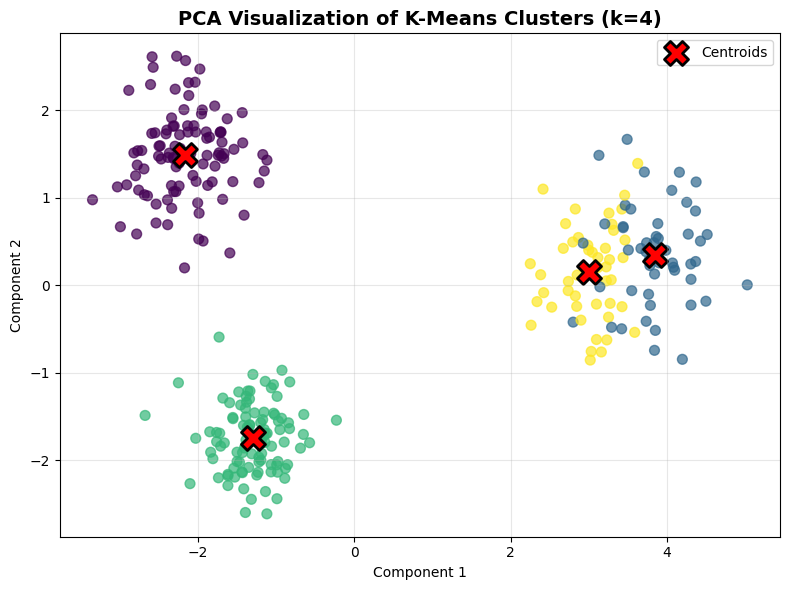

In [14]:
# Plot data
plot_kmeans_clusters(X_reduced, kmeans_labels, centroids=centroids_reduced, title=title)

K seems to be too large, since visually we see 3 clusters, and one got split up to account for 4 clusters.

### c) Let's analyze the Elbow plot. 
- What is the optimal number of clusters? Why?

#### Your Answer:

In [15]:
# Student Code

#### Solution:

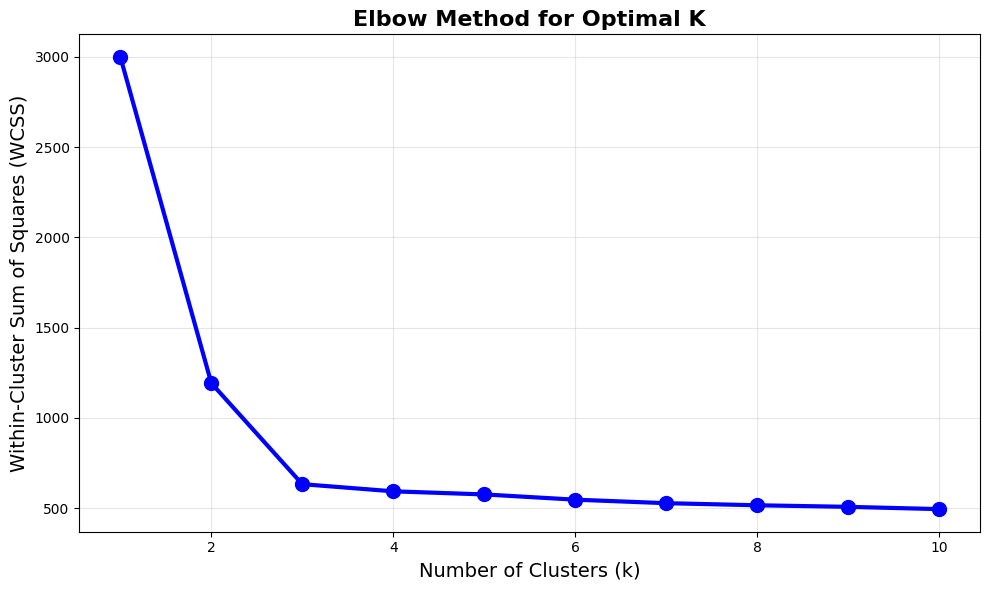

In [16]:
# Elbow Method for optimal k
k_range = range(1, 11)
wcss = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

plot_elbow_method(k_range, wcss)

The optimal number of clusters is 3, as indicated by the "elbow" in the plot.

### d) Fit K-Means again with the optimal *k* and visualize it?
- Did the results improve?

#### Your Answer:

In [17]:
# Student Code

#### Solution:

In [18]:
# Fit K-Means with k = 3
kmeans_opt = KMeans(n_clusters=3, random_state=42)
kmeans_labels_opt = kmeans_opt.fit_predict(X)
kmeans_centroids_opt = kmeans_opt.cluster_centers_
title_opt = "PCA Visualization of optimal K-Means (k=3)"

In [19]:
# Transform the new centroids
centroids_opt_reduced = pca.transform(kmeans_centroids_opt)

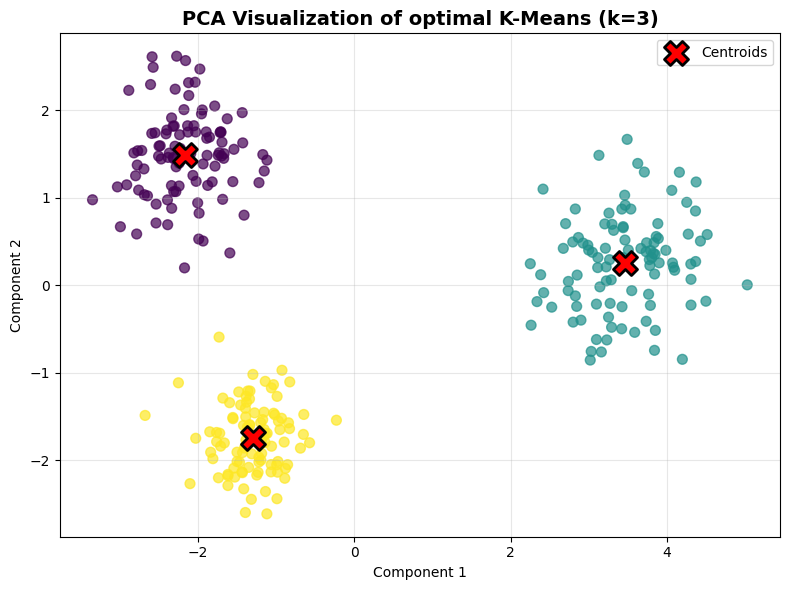

In [20]:
# Visualize the new clusters
plot_kmeans_clusters(X_reduced, kmeans_labels_opt, centroids_opt_reduced, title=title_opt)

### e) Let's calculate the silhouette score for the best k and our initial try, and visualize it using the reduced data.

#### Your Answer:

In [21]:
# Code

#### Solution:

In [22]:
# Calculate silhouette scores for 3 clusters
silhouette_scores_opt = silhouette_score(X, kmeans_labels_opt)
sample_silhouette_values_opt = silhouette_samples(X, kmeans_labels_opt)

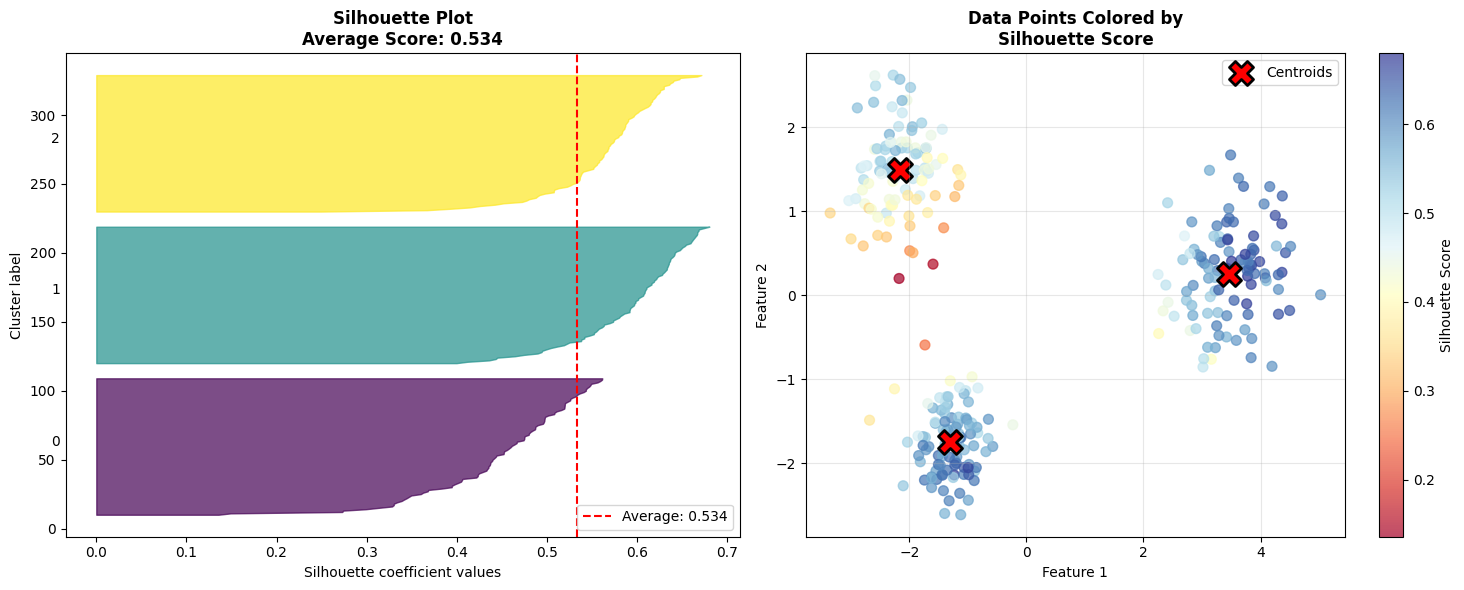

In [23]:
# Plot silhouette scores
plot_silhouette_scores(X_reduced, kmeans_labels_opt, centroids_opt_reduced, silhouette_scores_opt, sample_silhouette_values_opt)

In [24]:
# Recalculate silhouette score for 4 clusters
silhouette_scores = silhouette_score(X, kmeans_labels)
sample_silhouette_values = silhouette_samples(X, kmeans_labels)

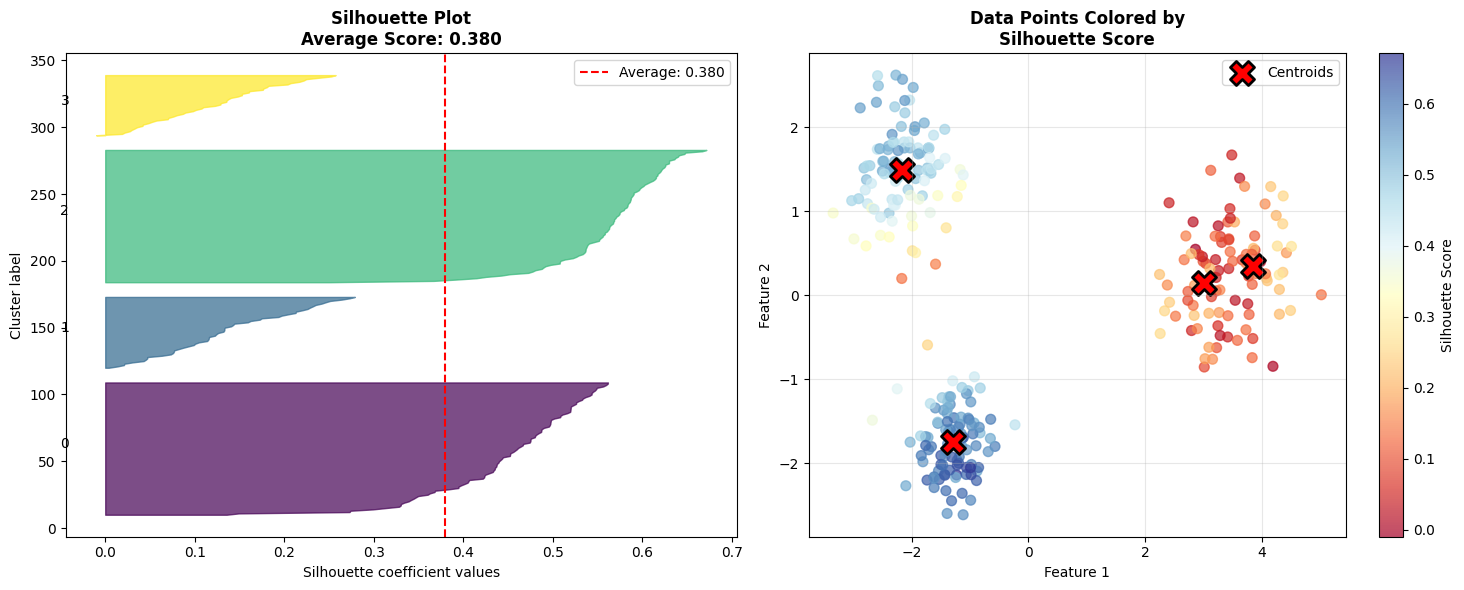

In [25]:
# Plot silhouette scores for 4 clusters
plot_silhouette_scores(X_reduced, kmeans_labels, centroids_reduced, silhouette_scores, sample_silhouette_values)

### f) Extract the centroids for each cluster of your best solution.
- Interpret the mean values of `BMI`, `Systolig_BP`, `Glucose_mmol_L`.
- What do these mean values tell you about the clusters?

#### Your Answer:

In [26]:
# Student Code

#### Solution:

In [27]:
features = ['BMI', 'Systolic_BP', 'Glucose_mmol_L']
print_centroid_information(df, kmeans_centroids, scaler, features=features)

                 Cluster 0  Cluster 1  Cluster 2  Cluster 3
BMI              34.366940  28.003751  21.905808  28.210686
Systolic_BP     110.013894  74.453002  95.345430  75.001374
Glucose_mmol_L    2.847113   6.856121   3.179596   6.521607


### g) What do you conclude about the clustering?
- Did it work well? Why or why not?

#### Your Answer:

#### Solution:
- Elbow plot shows a clear "elbow" at k=3, indicating that 3 clusters is optimal.
- PCA visualization shows distinct clusters, suggesting that K-Means clustering effectively separated the patients into meaningful groups based on their biomarker measurements.
- The centroids reveal three distinct patient subgroups: one with high BMI, BP in older patients, another with high CRP, ESR with comorbidities, and a last one (well-controlled markers).

## 3. Hierarchical Clustering

TODO: Info about dataset:
This clinical dataset contains 200 patients with a chronic condition, featuring both continuous biomarkers (age, BMI, blood pressure, creatinine, hemoglobin) and categorical clinical variables (disease severity, comorbidities, treatment response, smoking status, NYHA functional class). The dataset includes realistic clinical noise and heterogeneity, with categorical variables having multiple levels (not just binary) to reflect real-world clinical complexity.

Numeric variables: Age, BMI, Systolic_BP, Creatinine, Hemoglobin
Categorical variables: Disease_severity (3 levels), Comorbidity_diabetes (2 levels), Comorbidity_hypertension (2 levels), Treatment_response (3 levels), Smoking_status (3 levels), NYHA_class (4 levels)
Built-in noise: 10% noise added to numeric variables, 5% random flips in categorical variables
Three underlying patient subgroups: Elderly cardiovascular, middle-aged metabolic, younger inflammatory profiles


In [28]:
# Necessary Imports
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from helper import print_cluster_information_table, plot_dendrogram
from helper import print_cluster_information_table
from gower import gower_matrix


### a) Load and inspect the dataset `data_todo.csv`.
- How many variables do you have?
- What types of features ("predictors") and targets ("outcomes") do you have? Note, technically we don't have a target here. But 
- Do you have categorical features? Are they coded as such?

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def create_mixed_clinical_dataset(n_patients=200):
    """
    Create a mixed clinical dataset with numeric and categorical variables
    Contains noise and realistic clinical heterogeneity
    """
    np.random.seed(42)
    
    # Define 3 patient subgroups
    n_per_group = n_patients // 3
    
    # Initialize lists to store data
    data = []
    true_labels = []
    
    # Group 1: Elderly with cardiovascular complications
    for i in range(n_per_group):
        patient = {
            'Age': np.random.normal(70, 8),
            'BMI': np.random.normal(28, 4),
            'Systolic_BP': np.random.normal(145, 15),
            'Creatinine': np.random.normal(1.4, 0.3),
            'Hemoglobin': np.random.normal(11.5, 1.2),
            'Disease_severity': np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.2, 0.5, 0.3]),
            'Comorbidity_diabetes': np.random.choice(['Yes', 'No'], p=[0.6, 0.4]),
            'Comorbidity_hypertension': np.random.choice(['Yes', 'No'], p=[0.8, 0.2]),
            'Treatment_response': np.random.choice(['Poor', 'Moderate', 'Good'], p=[0.5, 0.3, 0.2]),
            'Smoking_status': np.random.choice(['Never', 'Former', 'Current'], p=[0.3, 0.5, 0.2]),
            'NYHA_class': np.random.choice(['I', 'II', 'III', 'IV'], p=[0.1, 0.3, 0.4, 0.2])
        }
        data.append(patient)
        true_labels.append(0)
    
    # Group 2: Middle-aged with metabolic syndrome
    for i in range(n_per_group):
        patient = {
            'Age': np.random.normal(55, 10),
            'BMI': np.random.normal(32, 5),
            'Systolic_BP': np.random.normal(135, 12),
            'Creatinine': np.random.normal(1.1, 0.2),
            'Hemoglobin': np.random.normal(13.2, 1.0),
            'Disease_severity': np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.4, 0.4, 0.2]),
            'Comorbidity_diabetes': np.random.choice(['Yes', 'No'], p=[0.7, 0.3]),
            'Comorbidity_hypertension': np.random.choice(['Yes', 'No'], p=[0.6, 0.4]),
            'Treatment_response': np.random.choice(['Poor', 'Moderate', 'Good'], p=[0.3, 0.4, 0.3]),
            'Smoking_status': np.random.choice(['Never', 'Former', 'Current'], p=[0.4, 0.3, 0.3]),
            'NYHA_class': np.random.choice(['I', 'II', 'III', 'IV'], p=[0.4, 0.4, 0.2, 0.0])
        }
        data.append(patient)
        true_labels.append(1)
    
    # Group 3: Younger patients with inflammatory profile
    for i in range(n_per_group):
        patient = {
            'Age': np.random.normal(42, 12),
            'BMI': np.random.normal(24, 3),
            'Systolic_BP': np.random.normal(125, 10),
            'Creatinine': np.random.normal(0.9, 0.15),
            'Hemoglobin': np.random.normal(12.8, 1.1),
            'Disease_severity': np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.3, 0.4, 0.3]),
            'Comorbidity_diabetes': np.random.choice(['Yes', 'No'], p=[0.2, 0.8]),
            'Comorbidity_hypertension': np.random.choice(['Yes', 'No'], p=[0.3, 0.7]),
            'Treatment_response': np.random.choice(['Poor', 'Moderate', 'Good'], p=[0.2, 0.3, 0.5]),
            'Smoking_status': np.random.choice(['Never', 'Former', 'Current'], p=[0.6, 0.2, 0.2]),
            'NYHA_class': np.random.choice(['I', 'II', 'III', 'IV'], p=[0.6, 0.3, 0.1, 0.0])
        }
        data.append(patient)
        true_labels.append(2)
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Add noise to numeric variables
    numeric_cols = ['Age', 'BMI', 'Systolic_BP', 'Creatinine', 'Hemoglobin']
    for col in numeric_cols:
        noise = np.random.normal(0, df[col].std() * 0.1, len(df))
        df[col] = df[col] + noise
    
    # Add some random categorical noise (flip some values)
    categorical_cols = ['Disease_severity', 'Comorbidity_diabetes', 'Comorbidity_hypertension', 
                       'Treatment_response', 'Smoking_status', 'NYHA_class']
    for col in categorical_cols:
        # Randomly flip 5% of values
        flip_indices = np.random.choice(len(df), size=int(0.05 * len(df)), replace=False)
        unique_values = df[col].unique()
        for idx in flip_indices:
            current_val = df.loc[idx, col]
            new_val = np.random.choice([v for v in unique_values if v != current_val])
            df.loc[idx, col] = new_val
    
    # Ensure positive values for certain variables
    df['Age'] = np.abs(df['Age'])
    df['BMI'] = np.abs(df['BMI'])
    df['Systolic_BP'] = np.abs(df['Systolic_BP'])
    df['Creatinine'] = np.abs(df['Creatinine'])
    df['Hemoglobin'] = np.abs(df['Hemoglobin'])
    
    # Convert categorical variables to proper categorical dtype
    for col in categorical_cols:
        df[col] = df[col]#.astype('category')
    
    # Randomize order
    random_indices = np.random.permutation(len(df))
    df = df.iloc[random_indices].reset_index(drop=True)
    true_labels = np.array(true_labels)[random_indices]
    
    return df, true_labels

# Create the dataset
df, true_labels = create_mixed_clinical_dataset(200)

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())

print("\nCategorical Variables Summary:")
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].value_counts().to_dict()}")


Dataset Shape: (198, 11)

Data Types:
Age                         float64
BMI                         float64
Systolic_BP                 float64
Creatinine                  float64
Hemoglobin                  float64
Disease_severity             object
Comorbidity_diabetes         object
Comorbidity_hypertension     object
Treatment_response           object
Smoking_status               object
NYHA_class                   object
dtype: object

First few rows:
         Age        BMI  Systolic_BP  Creatinine  Hemoglobin Disease_severity  \
0  20.683679  22.448353   150.961756    0.842703   13.030787         Moderate   
1  62.710404  33.687275   166.105799    0.965958   12.624673             Mild   
2  57.348697  28.877922   137.375014    1.221770   13.242701             Mild   
3  53.058541  21.662985   109.538620    1.113346   12.472358         Moderate   
4  56.632266  24.327240   148.541490    1.390223   10.239944           Severe   

  Comorbidity_diabetes Comorbidity_hypertension 

#### Your Answer:

In [30]:
# Student Code

#### Solution:

In [31]:
# Load Data
# df = pd.read_csv('todo.csv') 

In [32]:
# Inspect data
print(df.shape)
print(df.head())

(198, 11)
         Age        BMI  Systolic_BP  Creatinine  Hemoglobin Disease_severity  \
0  20.683679  22.448353   150.961756    0.842703   13.030787         Moderate   
1  62.710404  33.687275   166.105799    0.965958   12.624673             Mild   
2  57.348697  28.877922   137.375014    1.221770   13.242701             Mild   
3  53.058541  21.662985   109.538620    1.113346   12.472358         Moderate   
4  56.632266  24.327240   148.541490    1.390223   10.239944           Severe   

  Comorbidity_diabetes Comorbidity_hypertension Treatment_response  \
0                   No                       No               Good   
1                  Yes                       No           Moderate   
2                  Yes                       No           Moderate   
3                   No                       No               Good   
4                   No                      Yes           Moderate   

  Smoking_status NYHA_class  
0         Former         II  
1          Never      

In [33]:
# Check the features
print("Features:")
print(df.columns.tolist())

Features:
['Age', 'BMI', 'Systolic_BP', 'Creatinine', 'Hemoglobin', 'Disease_severity', 'Comorbidity_diabetes', 'Comorbidity_hypertension', 'Treatment_response', 'Smoking_status', 'NYHA_class']


In [34]:
# Check for categorical features
print("Data types:")
print(df.dtypes)


Data types:
Age                         float64
BMI                         float64
Systolic_BP                 float64
Creatinine                  float64
Hemoglobin                  float64
Disease_severity             object
Comorbidity_diabetes         object
Comorbidity_hypertension     object
Treatment_response           object
Smoking_status               object
NYHA_class                   object
dtype: object


In [35]:
# for each categorical feature, print the unique values
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = [str(val) for val in df[col].unique()]
    print(f"{col}: {unique_vals}")

Disease_severity: ['Moderate', 'Mild', 'Severe']
Comorbidity_diabetes: ['No', 'Yes']
Comorbidity_hypertension: ['No', 'Yes']
Treatment_response: ['Good', 'Moderate', 'Poor']
Smoking_status: ['Former', 'Never', 'Current']
NYHA_class: ['II', 'III', 'I', 'IV']


In [36]:
# Prepare dataset for later analysis
X = df

Note: I changed it to performing hierarchical clustering.

### b) Perform Hierarchical clustering on the dataset.
 If you encounter an error what could be the reason? How can you fix it?

#### Your Answer:

In [37]:
# Student Code

#### Solution:

In [38]:
# Perfrom Hierarchical clustering
try:
    # Attempt to perform hierarchical clustering
    hier_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
    hier_labels = hier_model.fit_predict(X)
except ValueError as e:
    print(f"Error: {e}")
    print("Hierarchical clustering requires numerical data. Consider encoding categorical variables or using a distance metric that supports mixed data types.")

Error: could not convert string to float: np.str_('Moderate')
Hierarchical clustering requires numerical data. Consider encoding categorical variables or using a distance metric that supports mixed data types.


To include the categorical data, we can compute Gower distance and perform the clustering on the resulting distance matrix.

### c) Compute the Gower distance matrix.

In [39]:
# Student Code

In [40]:
# Compute Gower distance matrix
gower_dist = gower_matrix(X)

### d) Now let's visualize the dendrogram. 
What do you observe? What does the y-axis represent? How can you use it to determine the number of clusters?

In [41]:
# Student Code

In [42]:
# Perform clustering on Gower distance matrix using `AgglomerativeClustering`
hier_gower_full = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='precomputed', linkage='average')
hier_gower_full = hier_gower_full.fit(gower_dist)

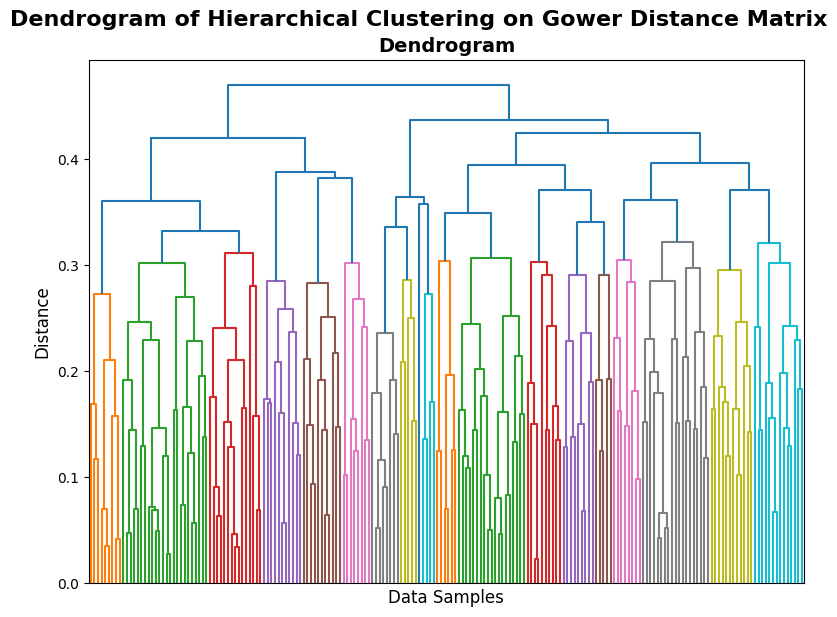

In [43]:
plot_dendrogram(hier_gower_full, title="Dendrogram of Hierarchical Clustering on Gower Distance Matrix")

We observe that we have 2 larger groups, which split into two more smaller groups. The y-axis represents the distance between clusters, which can be used to determine the number of clusters by looking for jumps in the distance values. Therefore it looks like suitable values would be 2 or 4 clusters.

### e) Now let's visualize the data using PCA.
- Choose the number of clusters based on the dendrogram.

In [44]:
# Perform clustering on Gower distance matrix using `AgglomerativeClustering`
n_cluster = 5
hier_gower = AgglomerativeClustering(n_clusters=n_cluster, metric='precomputed', linkage='average', compute_distances=True)
hier_gower_labels = hier_gower.fit_predict(gower_dist)

In [45]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(gower_dist)

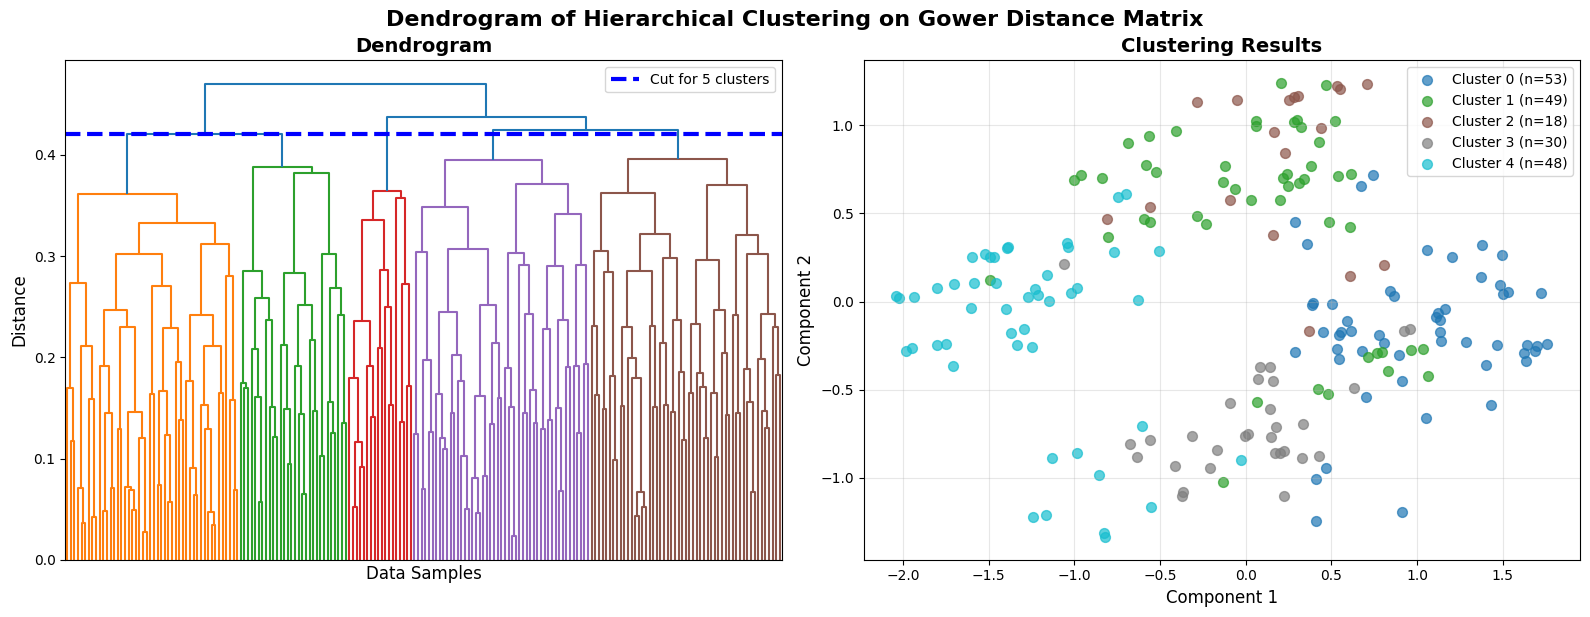

In [46]:
plot_dendrogram(hier_gower, data=gower_dist, cluster_labels=hier_gower_labels, data_reduced=X_reduced, num_clusters=n_cluster, title="Dendrogram of Hierarchical Clustering on Gower Distance Matrix")

### f) Are the clusters of patient subpopulations visible? 
- How are they characterized? 

*Hint:* Use the function `print_cluster_information_table` to calculate the mean of features per cluster and interpret the results.

In [47]:
# Student Code

In [48]:
# Usage example:
features = ['Age', 'BMI', 'Systolic_BP', 'Creatinine', 'Hemoglobin']
print_cluster_information_table(df, hier_gower_labels, features=features)

Cluster Characteristics:
Numeric: mean values | Categorical: mode (count/total, %)
             Cluster 0 Cluster 1 Cluster 2 Cluster 3 Cluster 4
Age              64.11     56.55     58.48     56.16     45.06
BMI              28.27     28.67     28.77     29.89     24.76
Systolic_BP     140.45    136.23    141.50    136.54    125.76
Creatinine        1.33      1.13      1.28      1.12      0.94
Hemoglobin       12.07     12.48     12.77     12.60     13.13
Cluster Size      n=53      n=49      n=18      n=30      n=48


- We see 2 or 4 cluster solutions in the dendrogram
- These clusters are clearly seperable with UMAP and somewhat seperable with PCA
- The means show that the main differences between the clusters lie in the comorbidity_diabetes and comorbidity_hypertension. The clustering split the patients into four groups depending on the combination of these parameters!

## 4. DBSCAN Clustering

Maybe change to this dataset: https://bioinformatics-training.github.io/intro-machine-learning-2017/clustering.html#example-gene-expression-profiling-of-human-tissues-2


### a) Load and inspect the dataset `data_todo.csv`.
- What types of features ("predictors") and targets ("outcomes") do you have?

In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def create_complex_clinical_dataset(n_patients=400):
    """
    Create a clinical dataset with complex, non-linear relationships
    Simulates realistic clinical scenarios where patient subgroups
    form non-convex clusters that K-means would struggle with
    """
    np.random.seed(42)
    
    # Create base patterns using sklearn's datasets
    n_per_pattern = n_patients // 4
    
    # Pattern 1: Two crescent-shaped groups (e.g., treatment response vs biomarker)
    moons_data, _ = make_moons(n_samples=n_per_pattern, noise=0.15, random_state=42)
    
    # Pattern 2: Circular pattern (e.g., metabolic syndrome with central obesity)
    circles_data, _ = make_circles(n_samples=n_per_pattern, noise=0.1, factor=0.4, random_state=42)
    
    # Pattern 3: Dense blob (e.g., normal healthy controls)
    blob_data, _ = make_blobs(n_samples=n_per_pattern, centers=1, n_features=2, 
                             cluster_std=0.3, random_state=42)
    
    # Pattern 4: Elongated cluster (e.g., progressive disease trajectory)
    elongated_x = np.random.normal(0, 2, n_per_pattern)
    elongated_y = elongated_x * 0.5 + np.random.normal(0, 0.3, n_per_pattern)
    elongated_data = np.column_stack([elongated_x, elongated_y])
    
    # Combine all patterns and transform to clinical meaningful ranges
    all_data = np.vstack([moons_data, circles_data, blob_data, elongated_data])
    
    # Transform to clinical ranges and add more features
    # Feature 1: Inflammatory marker (CRP-like)
    crp_like = all_data[:, 0] * 15 + 25  # Range ~10-40 mg/L
    crp_like = np.maximum(crp_like, 0.1)  # Ensure positive
    
    # Feature 2: Metabolic marker (Glucose-like)
    glucose_like = all_data[:, 1] * 20 + 100  # Range ~80-120 mg/dL
    glucose_like = np.maximum(glucose_like, 60)  # Ensure realistic minimum
    
    # Feature 3: Cardiac marker (derived from both patterns)
    cardiac_marker = (all_data[:, 0] * all_data[:, 1]) * 10 + 15
    cardiac_marker += np.random.normal(0, 2, len(cardiac_marker))  # Add noise
    
    # Feature 4: Renal function (non-linear relationship)
    renal_function = np.sin(all_data[:, 0] * 2) * 0.5 + all_data[:, 1] * 0.3 + 1.2
    renal_function += np.random.normal(0, 0.1, len(renal_function))
    renal_function = np.maximum(renal_function, 0.5)  # Ensure positive
    
    # Feature 5: Age-related biomarker
    age_biomarker = np.sqrt(np.abs(all_data[:, 0])) * 10 + np.abs(all_data[:, 1]) * 5 + 45
    age_biomarker += np.random.normal(0, 3, len(age_biomarker))
    age_biomarker = np.maximum(age_biomarker, 20)  # Ensure realistic minimum
    
    # Feature 6: Lipid profile (complex interaction)
    lipid_profile = (all_data[:, 0]**2 + all_data[:, 1]**2) * 30 + 150
    lipid_profile += np.random.normal(0, 10, len(lipid_profile))
    lipid_profile = np.maximum(lipid_profile, 100)  # Ensure realistic minimum
    
    # Add additional noise and outliers
    n_outliers = int(0.05 * n_patients)  # 5% outliers
    outlier_indices = np.random.choice(len(all_data), size=n_outliers, replace=False)
    
    # Create extreme outliers
    for idx in outlier_indices:
        crp_like[idx] *= np.random.uniform(2, 4)
        glucose_like[idx] *= np.random.uniform(1.5, 2.5)
        cardiac_marker[idx] *= np.random.uniform(2, 3)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Inflammatory_Marker_CRP': crp_like,
        'Metabolic_Glucose': glucose_like,
        'Cardiac_Troponin': cardiac_marker,
        'Renal_Creatinine': renal_function,
        'Age_Related_Biomarker': age_biomarker,
        'Lipid_Cholesterol': lipid_profile
    })
    
    # Add more complex noise patterns
    # Introduce missing value patterns (fill with median for clustering)
    missing_indices = np.random.choice(len(df), size=int(0.02 * len(df)), replace=False)
    for idx in missing_indices:
        col = np.random.choice(df.columns)
        df.loc[idx, col] = np.nan
    
    # Fill missing values with median
    df = df.fillna(df.median())
    
    # Add measurement noise (clinical lab variation)
    for col in df.columns:
        measurement_noise = np.random.normal(0, df[col].std() * 0.05, len(df))
        df[col] = df[col] + measurement_noise
    
    # Randomize order
    random_indices = np.random.permutation(len(df))
    df = df.iloc[random_indices].reset_index(drop=True)
    
    # Create true cluster labels based on original patterns (for validation)
    true_labels = np.array([0]*n_per_pattern + [1]*n_per_pattern + 
                          [2]*n_per_pattern + [3]*n_per_pattern)
    true_labels = true_labels[random_indices]
    
    return df, true_labels

# Create the dataset
df, true_labels = create_complex_clinical_dataset(400)

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nDataset Description:")
print(df.describe())

print("\nFirst few rows:")
print(df.head(10))

print("\nDataset Info:")
print(f"Number of variables: {df.shape[1]}")
print(f"Number of patients: {df.shape[0]}")
print(f"All features are numerical (continuous biomarkers)")

# Visualize the complex relationships
#fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# axes = axes.ravel()

# # Plot pairwise relationships to show complexity
# feature_pairs = [
#     ('Inflammatory_Marker_CRP', 'Metabolic_Glucose'),
#     ('Cardiac_Troponin', 'Renal_Creatinine'),
#     ('Age_Related_Biomarker', 'Lipid_Cholesterol'),
#     ('Inflammatory_Marker_CRP', 'Cardiac_Troponin'),
#     ('Metabolic_Glucose', 'Renal_Creatinine'),
#     ('Age_Related_Biomarker', 'Inflammatory_Marker_CRP')
# ]

# for i, (x_col, y_col) in enumerate(feature_pairs):
#     axes[i].scatter(df[x_col], df[y_col], alpha=0.6, s=30)
#     axes[i].set_xlabel(x_col)
#     axes[i].set_ylabel(y_col)
#     axes[i].set_title(f'{x_col} vs {y_col}')

# plt.tight_layout()
#plt.show()

# Show correlation matrix
#plt.figure(figsize=(10, 8))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix of Clinical Biomarkers')
#plt.show()

Dataset Shape: (400, 6)

Data Types:
Inflammatory_Marker_CRP    float64
Metabolic_Glucose          float64
Cardiac_Troponin           float64
Renal_Creatinine           float64
Age_Related_Biomarker      float64
Lipid_Cholesterol          float64
dtype: object

Dataset Description:
       Inflammatory_Marker_CRP  Metabolic_Glucose  Cardiac_Troponin  \
count               400.000000         400.000000        400.000000   
mean                 22.492400         154.442979        -44.051864   
std                  22.300357          96.735180        124.011879   
min                  -2.970596          54.579204       -676.123903   
25%                   1.122041          95.213779        -40.727515   
50%                  21.092132         108.998225         13.922775   
75%                  34.152406         255.124573         22.892000   
max                 191.076954         673.792046        153.731514   

       Renal_Creatinine  Age_Related_Biomarker  Lipid_Cholesterol  
count    

#### Your Answer:

#### Solution:


In [50]:
# Load Data
# df = pd.read_csv('todo.csv')


In [51]:
# Inspect data
print(df.shape)
df.head()

(400, 6)


,Inflammatory_Marker_CRP,Metabolic_Glucose,Cardiac_Troponin,Renal_Creatinine,Age_Related_Biomarker,Lipid_Cholesterol
0,0.448688,270.542398,-199.674966,4.384544,102.874330,2628.311719
1,-0.753005,275.015923,-196.373513,4.262268,104.209996,2456.276485
2,45.368262,90.415441,13.537962,1.200815,65.898116,133.588322
3,-0.284114,278.002857,-201.059251,4.233666,103.833760,2770.340266
4,-0.523356,652.534260,-563.873730,4.465646,104.970987,3030.463463


In [52]:
# Check the features and outcomes
print("Features:")
print(df.columns.tolist())

Features:
['Inflammatory_Marker_CRP', 'Metabolic_Glucose', 'Cardiac_Troponin', 'Renal_Creatinine', 'Age_Related_Biomarker', 'Lipid_Cholesterol']


In [53]:
# Check for categorical features and their values
print("Data types:")
print(df.dtypes)

Data types:
Inflammatory_Marker_CRP    float64
Metabolic_Glucose          float64
Cardiac_Troponin           float64
Renal_Creatinine           float64
Age_Related_Biomarker      float64
Lipid_Cholesterol          float64
dtype: object


In [54]:
# Prepare dataset for later analysis
scaler = StandardScaler()
X = scaler.fit_transform(df)

Let's find suitable parameters for DBSCAN. First, we need to find the optimal epsilon value. 
### b) Plot the k-distance graph. 
- Do you see an elbow in the graph? If so, what is the optimal epsilon value?

In [55]:
# Student Code

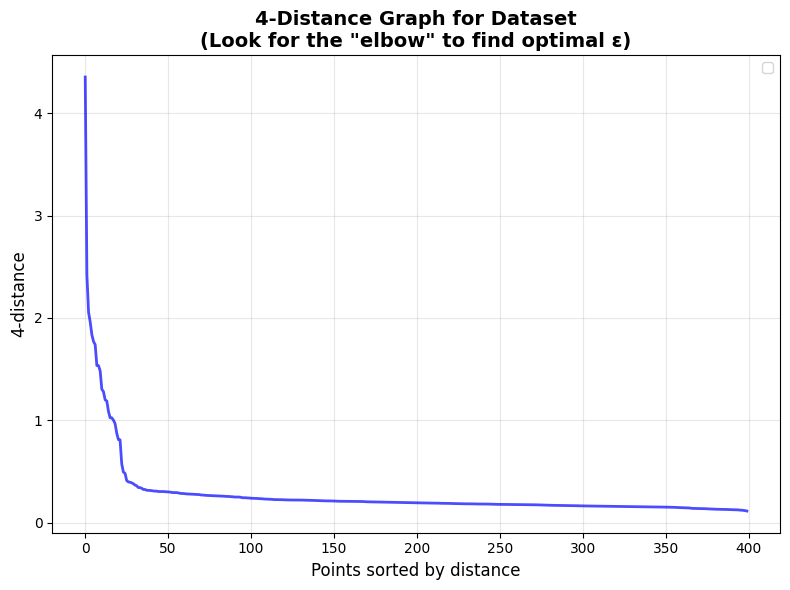

In [56]:
_ = plot_k_distance_graph(X, k=4)

As we can see there seems to be an elbow around 0.5, so let's choose values around 0.5 for epsilon.

### c) Let's visualize the clusters using PCA.
What can you conclude?

*Hint:* If you have not found an elbow in the previous task, use epsilon=0.5. For min_samples you can start with 7 (since we have 6 features).

In [57]:
# Student Code

In [58]:
# Perform Dimensionality Reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [59]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

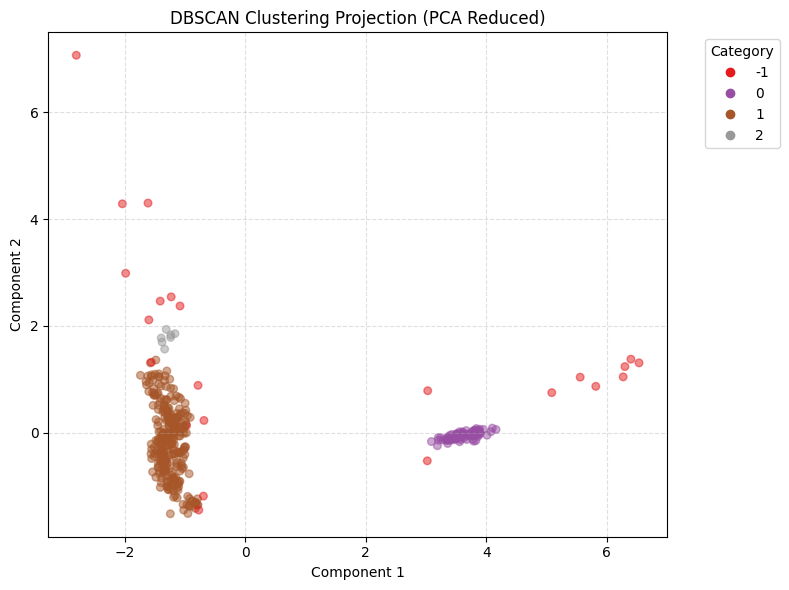

In [60]:
# TODO: Maybe a different function would be more helpful
plot_projection(X_reduced, dbscan_labels, title="DBSCAN Clustering Projection (PCA Reduced)",
                xlabel="Component 1", ylabel="Component 2")

### d) Now explore more parameter combinations and see how the clusters change. 
What do you observe? Are the chosen parameters optimal?

*Hint:* Use the `plot_dbscan_grid` function to visualize the clusters for different parameter combinations. You need to specify the data to cluster on and the one you want to plot.

In [61]:
# Student Code

In [62]:
# Solution
eps_values = [0.2, 0.4, 0.5, 0.6, 0.8]
min_samples_values = [2, 4, 5, 6, 8]

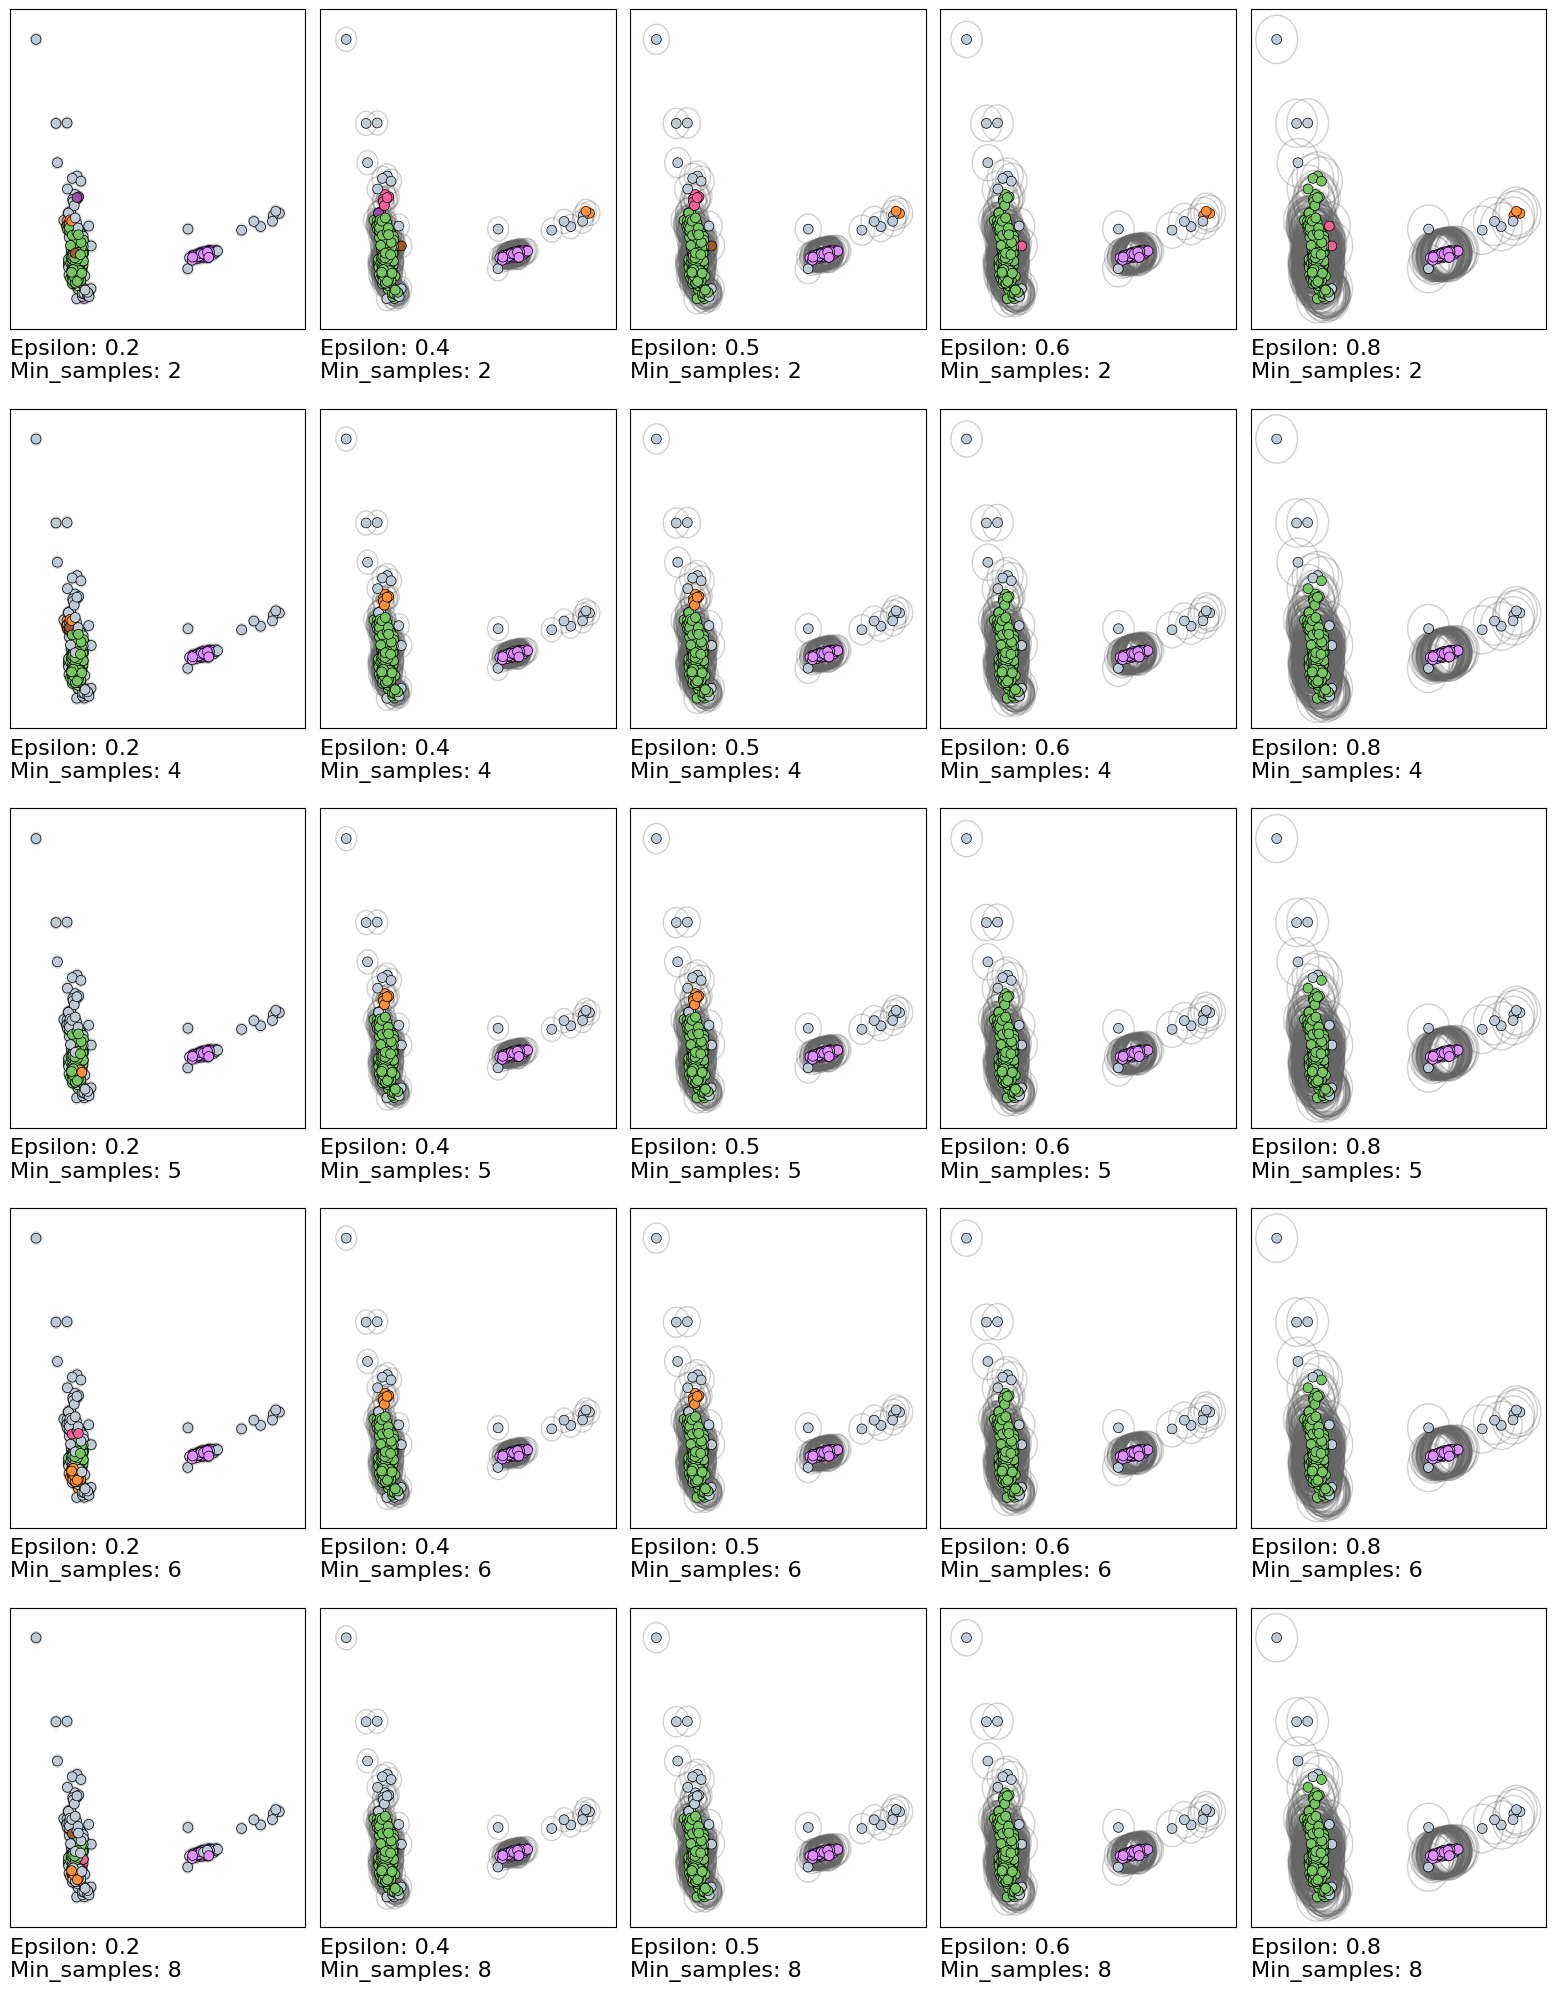

In [63]:
# plot dbscan grid
plot_dbscan_grid(X, eps_values, min_samples_values, X_reduced=X_reduced)

Maybe a bigger range? There's not much difference visible between the clustering, they all seem to find two main clusters present in the data.

### e) What are the mean values of features per clusters?
Can you reasonable interpret this?

In [64]:
# Student Code

In [65]:
print_cluster_information_table(df, dbscan_labels)

Cluster Characteristics:
Numeric: mean values | Categorical: mode (count/total, %)
                        Cluster -1 Cluster 0 Cluster 1 Cluster 2
Inflammatory_Marker_CRP      44.45      0.05     26.82     69.61
Metabolic_Glucose           312.89    280.40    100.91    130.23
Cardiac_Troponin           -159.21   -215.90     18.88     60.30
Renal_Creatinine              2.49      4.36      1.20      1.51
Age_Related_Biomarker        75.38    106.39     55.93     71.22
Lipid_Cholesterol          1282.67   2788.84    199.20    498.65
Cluster Size                  n=23      n=91     n=279       n=7
